In [21]:
import tensorflow as tf
import tensorflow_datasets as tfds

In [22]:
#Download data set of Fashion MNIST of Zalando
data, metadata = tfds.load('fashion_mnist', as_supervised=True, with_info=True)

In [23]:
#Print metadata
metadata

tfds.core.DatasetInfo(
    name='fashion_mnist',
    full_name='fashion_mnist/3.0.1',
    description="""
    Fashion-MNIST is a dataset of Zalando's article images consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes.
    """,
    homepage='https://github.com/zalandoresearch/fashion-mnist',
    data_dir='/root/tensorflow_datasets/fashion_mnist/3.0.1',
    file_format=tfrecord,
    download_size=29.45 MiB,
    dataset_size=36.42 MiB,
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=10),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_examples=10000, num_shards=1>,
        'train': <SplitInfo num_examples=60000, num_shards=1>,
    },
    citation="""@article{DBLP:journals/corr/abs-1708-07747,
      author    =

In [24]:
#Get diferent training data types
training_data, test_data = data['train'], data['test']

In [25]:
#Tag 10 posibe categories
classes_name = metadata.features['label'].names

In [26]:
classes_name

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [27]:
#Data normailize function
def normalize(images, tags):
  images = tf.cast(images, tf.float32)
  images /= 255
  return images, tags

#Normalize training data
training_data = training_data.map(normalize)
test_data = test_data.map(normalize)

#Add to cache
training_data = training_data.cache()
test_data = test_data.cache()

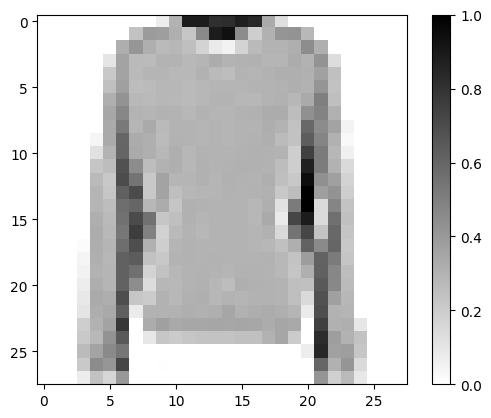

In [28]:
#Print test image
for image, tag in training_data.take(1):
  break
image = image.numpy().reshape((28,28)) #ReSize

import matplotlib.pyplot as plt

#Print
plt.figure()
plt.imshow(image, cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

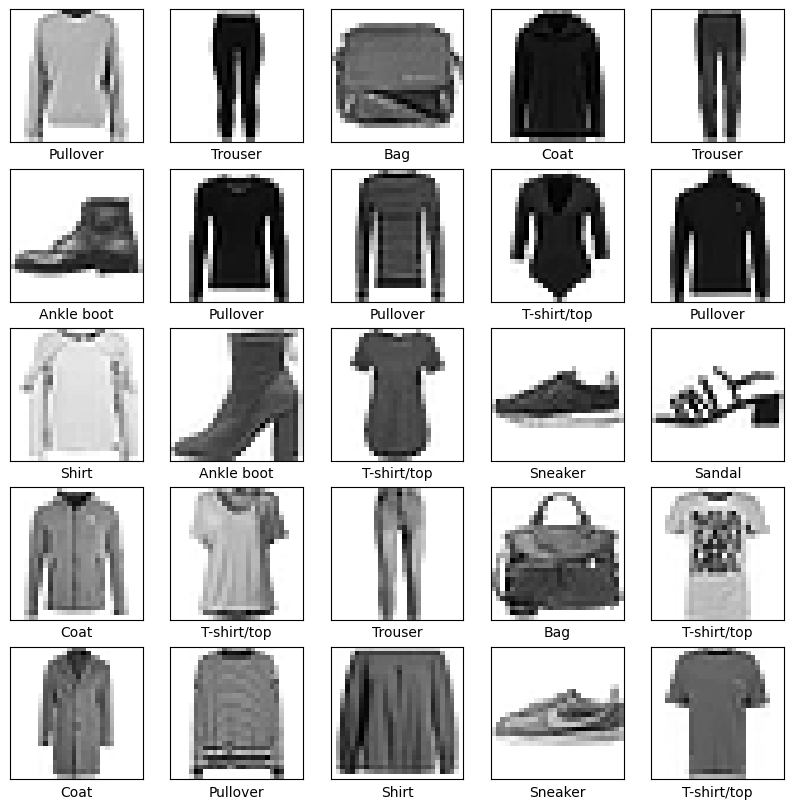

In [29]:
#Print more
plt.figure(figsize=(10,10))
for i, (image, tag) in enumerate(training_data.take(25)):
  image = image.numpy().reshape((28,28))
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(image, cmap=plt.cm.binary)
  plt.xlabel(classes_name[tag])
plt.show()

In [30]:
#Create model
model = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28,28,1)), #1 - black and white
  tf.keras.layers.Dense(50, activation=tf.nn.relu),
  tf.keras.layers.Dense(50, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax) #For clasification networks
])

In [31]:
#Compile model
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

In [32]:
#Data training and test numbers
ej_num_training = metadata.splits["train"].num_examples
ej_num_test = metadata.splits["test"].num_examples

In [33]:
print(ej_num_training)
print(ej_num_test)

60000
10000


In [34]:

SIZE_LOTE = 32

#Shuffle and repeat unorder the data
training_data = training_data.repeat().shuffle(ej_num_training).batch(SIZE_LOTE)
test_data = test_data.batch(SIZE_LOTE)

In [35]:
import math

#Train
historial = model.fit(training_data, epochs=5, steps_per_epoch= math.ceil(ej_num_training/SIZE_LOTE))

Epoch 1/5
1875/1875 [==============================] - 11s 2ms/step - loss: 0.5153 - accuracy: 0.8205
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3930 - accuracy: 0.8605
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3510 - accuracy: 0.8740
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3323 - accuracy: 0.8782
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3119 - accuracy: 0.8842


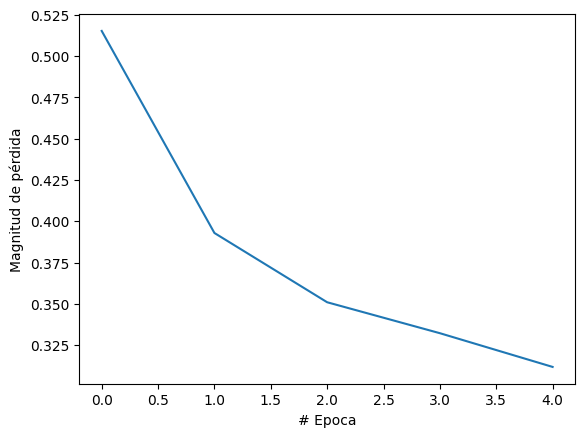

In [36]:
#See lose function
plt.xlabel("# Epoch")
plt.ylabel("Magnitude of the loss")
plt.plot(historial.history["loss"])

1/1 [==============================] - 0s 17ms/step


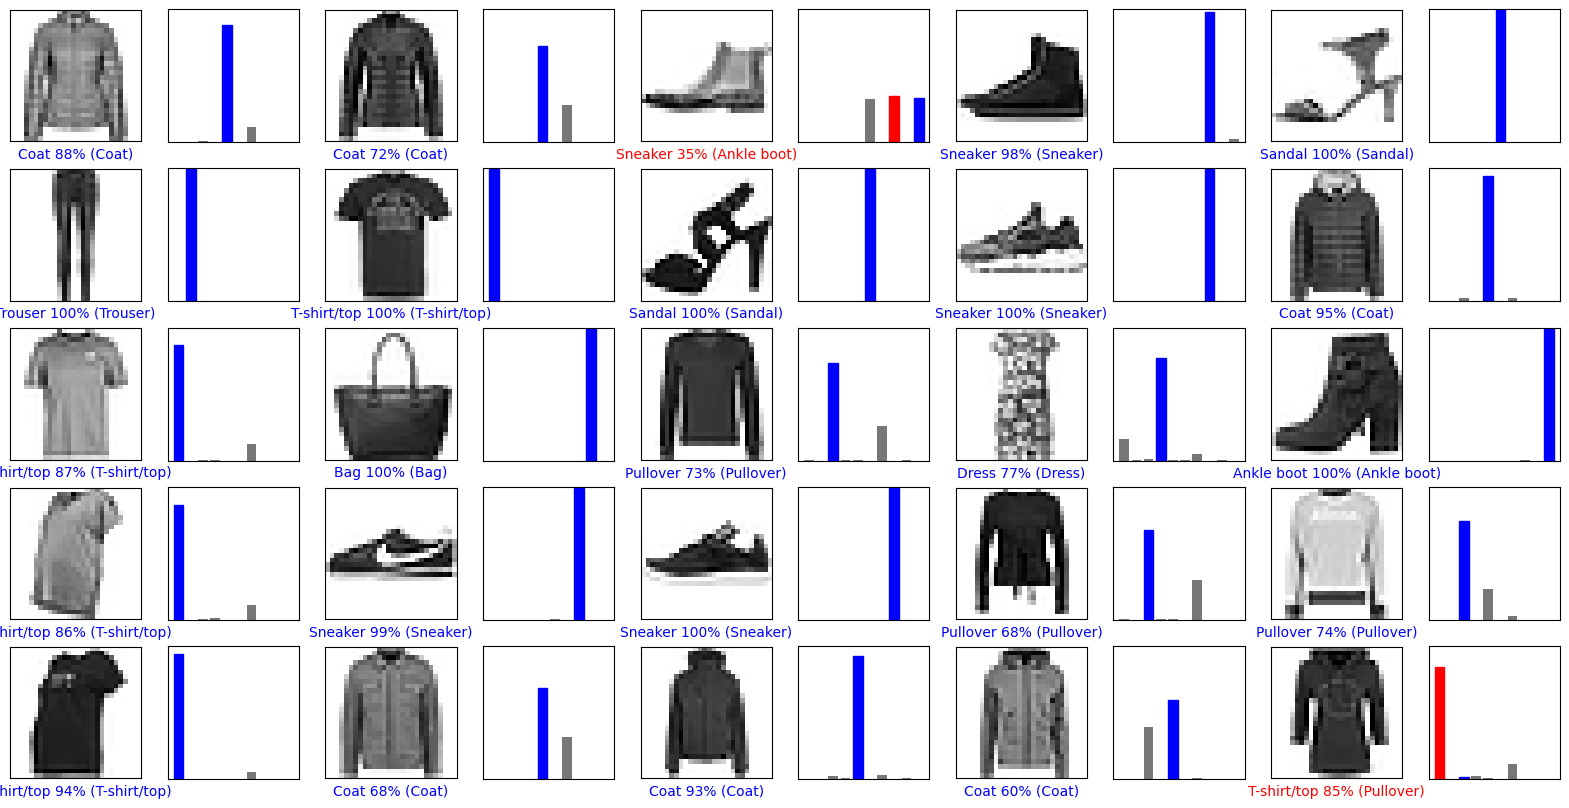

In [41]:
#Print and see the predictions
import numpy as np

for test_images, test_tags in test_data.take(1):
  test_images = test_images.numpy()
  test_tags = test_tags.numpy()
  predictions = model.predict(test_images)

def print_images(i, arr_predictions, real_tags, images):
  arr_predictions, real_tags, img = arr_predictions[i], real_tags[i], images[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img[...,0], cmap=plt.cm.binary)

  prediction_tag = np.argmax(arr_predictions)
  if prediction_tag == real_tags:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(classes_name[prediction_tag],
                                100*np.max(arr_predictions),
                                classes_name[real_tags]),
                                color=color)

def graphic_value(i, arr_predictions, real_tag):
  arr_predictions, real_tag = arr_predictions[i], real_tag[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  grafica = plt.bar(range(10), arr_predictions, color="#777777")
  plt.ylim([0, 1])
  prediction_tag = np.argmax(arr_predictions)

  grafica[prediction_tag].set_color('red')
  grafica[real_tag].set_color('blue')

rows = 5
columns = 5
num_imagenes = rows*columns
plt.figure(figsize=(2*2*columns, 2*rows))
for i in range(num_imagenes):
  plt.subplot(rows, 2*columns, 2*i+1)
  print_images(i, predictions, test_tags, test_images)
  plt.subplot(rows, 2*columns, 2*i+2)
  graphic_value(i, predictions, test_tags)

In [42]:
#Print one image only
image = test_images[9]
image = np.array([image])
prediction = model.predict(image)

print("Prediction: " + classes_name[np.argmax(prediction[0])])

1/1 [==============================] - 0s 22ms/step
Prediccion: Coat
